# 차원 축소 - 주성분 분석(PCA) w.IRIS
---


## 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['target'] = iris.target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 데이터 분리

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X.head(), y

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: target, Length: 150, dtype: int32)

In [13]:
# 테스트 셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2022)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [9]:
y_train.value_counts()

1    40
2    40
0    40
Name: target, dtype: int64

## 정규화
- 표준화

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 1.61735475, -0.09654676,  1.25507488,  1.17872479],
       [-1.2588689 ,  0.81212866, -1.04429895, -1.29822684],
       [ 1.11714194, -0.09654676,  0.73771577,  0.65726129],
       [-0.38349649, -1.00522219,  0.3928097 ,  0.00543191],
       [-0.75865609,  0.81212866, -1.33172067, -1.29822684],
       [-1.2588689 ,  0.81212866, -1.21675198, -1.29822684],
       [ 0.36682273, -0.09654676,  0.68023142,  0.78762716],
       [-0.13339008,  1.72080409, -1.15926764, -1.16786096],
       [ 0.49187593, -0.55088448,  0.62274708,  0.78762716],
       [-1.2588689 , -0.09654676, -1.33172067, -1.16786096],
       [ 2.61778037,  1.72080409,  1.54249661,  1.04835891],
       [-0.50854969,  1.94797295, -1.38920502, -1.03749509],
       [ 0.61692913, -0.32371562,  1.08262184,  0.78762716],
       [ 1.86746116, -0.32371562,  1.48501226,  0.78762716],
       [ 2.36767396, -0.55088448,  1.71494964,  1.04835891],
       [ 0.99208874, -0.32371562,  0.50777839,  0.13579779],
       [-0.13339008, -0.

In [19]:

y_train = y_train.values
y_test = y_test.values

## 차원 축소


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_train[:5]

array([[ 0.76039963,  0.15942903],
       [ 1.35328486, -0.7464587 ],
       [ 0.18659548, -0.29702751],
       [ 1.99400506,  0.24674649],
       [-2.23778189,  0.76016644]])

In [17]:
df = pd.DataFrame(X_train, columns = ['X_1', 'X_2'])
df.head()

,X_1,X_2
0,0.760400,0.159429
1,1.353285,-0.746459
2,0.186595,-0.297028
3,1.994005,0.246746
4,-2.237782,0.760166


In [20]:
df['y_train'] = y_train.astype('int')
df.head()


,X_1,X_2,y_train
0,0.760400,0.159429,1
1,1.353285,-0.746459,2
2,0.186595,-0.297028,1
3,1.994005,0.246746,2
4,-2.237782,0.760166,0


<AxesSubplot: xlabel='X_1', ylabel='X_2'>

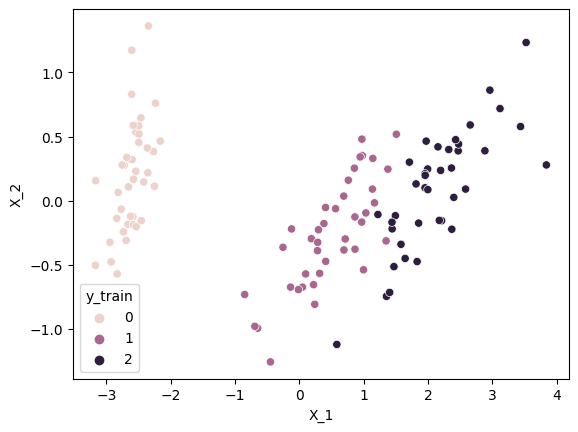

In [22]:
sns.scatterplot(data=df, x='X_1', y='X_2', hue='y_train')

## 분류 - Decision Tree

In [24]:
df_X = df[['X_1', 'X_2']]
df_y = df['y_train']

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(df_X, df_y) #정규화 안 함 결정 트리는 그렇게 크게 영향이 있는 건 아님
clf.score(df_X, df_y)

0.9666666666666667